## Data Prep

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns =None
pd.options.display.max_rows =40
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
mach_df = pd.read_csv('/Users/ravissa/Downloads/PdM_machines.csv')

In [3]:
fail_df = pd.read_csv('/Users/ravissa/Downloads/PdM_failures.csv')

In [4]:
maint_df = pd.read_csv('/Users/ravissa/Downloads/PdM_maint.csv')

In [5]:
err_df = pd.read_csv('/Users/ravissa/Downloads/PdM_errors.csv')

In [6]:
tlmtry_df = pd.read_csv('/Users/ravissa/Downloads/PdM_telemetry.csv')

In [7]:
fail_tlmtry_df = pd.merge(fail_df,tlmtry_df,how='left',on=('machineID','datetime'))
fail_tlmtry_df.sort_values('datetime')

,datetime,machineID,failure,volt,rotate,pressure,vibration
409,2015-01-02 03:00:00,56,comp3,209.881920,456.998211,121.198938,36.340331
739,2015-01-02 03:00:00,99,comp3,173.235663,453.152821,129.723362,44.624581
595,2015-01-02 03:00:00,83,comp4,186.639092,468.764381,93.068489,46.737446
430,2015-01-02 03:00:00,59,comp1,169.206648,519.137970,86.805497,42.009687
94,2015-01-02 03:00:00,16,comp1,170.524081,405.302970,109.855730,37.786365
...,...,...,...,...,...,...,...
389,2015-12-30 06:00:00,52,comp4,157.309819,362.760911,100.335067,56.812017
709,2015-12-31 06:00:00,95,comp1,184.969808,507.191449,122.983617,50.224889
668,2015-12-31 06:00:00,90,comp1,215.728683,467.771439,100.961884,44.469377
468,2015-12-31 06:00:00,64,comp1,190.820355,495.747474,105.052513,47.237444


In [9]:
ftm_df = pd.merge(fail_tlmtry_df,maint_df,how='left',on=('machineID'))
ftm_df

,datetime_x,machineID,failure,volt,rotate,pressure,vibration,datetime_y,comp
0,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2
1,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-07-16 06:00:00,comp4
2,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-07-31 06:00:00,comp3
3,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-12-13 06:00:00,comp1
4,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2015-01-05 06:00:00,comp4
...,...,...,...,...,...,...,...,...,...
24959,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-10-10 06:00:00,comp3
24960,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-10-25 06:00:00,comp4
24961,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-11-09 06:00:00,comp4
24962,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-12-09 06:00:00,comp2


In [10]:
ftee_df = pd.merge(ftm_df,err_df,how='left',on=('machineID'))
ftee_df.sort_values('datetime')
ftee_df

,datetime_x,machineID,failure,volt,rotate,pressure,vibration,datetime_y,comp,datetime,errorID
0,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2,2015-01-03 07:00:00,error1
1,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2,2015-01-03 20:00:00,error3
2,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2,2015-01-04 06:00:00,error5
3,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2,2015-01-10 15:00:00,error4
4,2015-01-05 06:00:00,1,comp4,179.303153,499.777962,111.833028,52.383097,2014-06-01 06:00:00,comp2,2015-01-22 10:00:00,error4
...,...,...,...,...,...,...,...,...,...,...,...
1021705,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-12-24 06:00:00,comp2,2015-11-21 08:00:00,error2
1021706,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-12-24 06:00:00,comp2,2015-12-04 02:00:00,error1
1021707,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-12-24 06:00:00,comp2,2015-12-08 06:00:00,error2
1021708,2015-12-09 06:00:00,100,comp2,144.720190,377.188361,109.995936,28.433400,2015-12-24 06:00:00,comp2,2015-12-08 06:00:00,error3


In [11]:
mach_data = ftee_df[["volt","rotate","pressure","vibration"]]
mach_data
#save as X data, predictor columns

,volt,rotate,pressure,vibration
0,179.303153,499.777962,111.833028,52.383097
1,179.303153,499.777962,111.833028,52.383097
2,179.303153,499.777962,111.833028,52.383097
3,179.303153,499.777962,111.833028,52.383097
4,179.303153,499.777962,111.833028,52.383097
...,...,...,...,...
1021705,144.720190,377.188361,109.995936,28.433400
1021706,144.720190,377.188361,109.995936,28.433400
1021707,144.720190,377.188361,109.995936,28.433400
1021708,144.720190,377.188361,109.995936,28.433400


In [12]:
mach_target = ftee_df[["failure"]]
mach_target
#save as Y target, decision columns

,failure
0,comp4
1,comp4
2,comp4
3,comp4
4,comp4
...,...
1021705,comp2
1021706,comp2
1021707,comp2
1021708,comp2


In [13]:
#get ndarray of all column names
Feature_names = mach_data.columns.values
Feature_names

array(['volt', 'rotate', 'pressure', 'vibration'], dtype=object)

In [14]:
#convert ndarray to list
listOfColumnNames=list(Feature_names)
listOfColumnNames

['volt', 'rotate', 'pressure', 'vibration']

In [15]:
target_names = mach_target.columns.values
target_names

array(['failure'], dtype=object)

In [16]:
mach_darr = mach_data.to_numpy()
mach_darr


array([[179.30315306, 499.77796238, 111.83302765,  52.38309672],
       [179.30315306, 499.77796238, 111.83302765,  52.38309672],
       [179.30315306, 499.77796238, 111.83302765,  52.38309672],
       ...,
       [144.72018994, 377.188361  , 109.99593588,  28.4333997 ],
       [144.72018994, 377.188361  , 109.99593588,  28.4333997 ],
       [144.72018994, 377.188361  , 109.99593588,  28.4333997 ]])

In [17]:
mach_target.failure.value_counts()

comp2    346925
comp1    249560
comp4    247165
comp3    178060
Name: failure, dtype: int64

In [18]:
mach_target

,failure
0,comp4
1,comp4
2,comp4
3,comp4
4,comp4
...,...
1021705,comp2
1021706,comp2
1021707,comp2
1021708,comp2


In [19]:
target_names = mach_target.columns.values
target_names

array(['failure'], dtype=object)

In [20]:
mach_target.failure.value_counts()

comp2    346925
comp1    249560
comp4    247165
comp3    178060
Name: failure, dtype: int64

In [21]:
mach_tar = mach_target.to_numpy()
mach_tar


array([['comp4'],
       ['comp4'],
       ['comp4'],
       ...,
       ['comp2'],
       ['comp2'],
       ['comp2']], dtype=object)

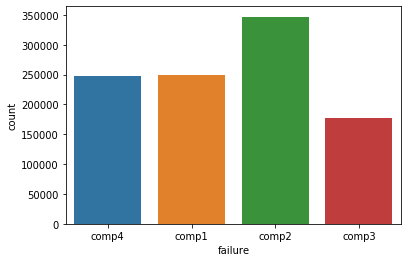

In [22]:
import seaborn as sns

x=mach_target['failure']
ax=sns.countplot(x=x, data=mach_data)

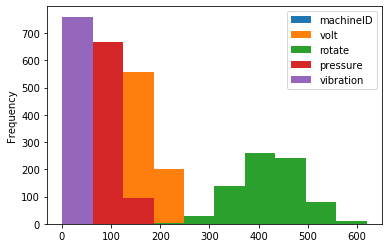

In [8]:
fail_tlmtry_df.plot.hist(fail_tlmtry_df.failure)

## Insights

### The following are the conclusions from the analysis above. 
1) The data was acquired in the form of .csv files
2) The four files were merged to identify the feature names and target columns
3) There are 4 major components are fail, of those Comp3 fails the least while the comp2 fails the most, with equal failures with comp4 and comp1.
4) The histogram shows that the rotate component has a peak and then tapers to zero, which would what is expected on machine failure.
5) The vibration of the machine is related to the rotation.
